<a href="https://colab.research.google.com/github/harnalashok/CatEncodersFamily/blob/main/makeclassification_pca_xgb_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset created using sklearn's `make_classification()`


In [ ]:
# Last amended: 14th June, 2023

## Basics

In [1]:
%reset -f

In [2]:
!pip install catencfamily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.3/230.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 58.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.3 MB/s eta 0:00:00
  Created wheel for python-igraph: filename=python_igraph-0.10.4-py3-none-any.whl size=9073 sha256=8cd6da77430d4af96ac597facd67569e9f47c8d017e0028043ebbefbf355eaed
  Stored in directory: /root/.cache/pip/wheels/49/27/15/dcf90953e3e3322e6f3e447514b20cf39b53c6518cb4a7bace
Successfully built python-igraph


In [6]:
# 1.0 Call libraries
import pandas as pd
import numpy as np


# 1.01
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA


# 1.02
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
from networkx import community



# 1.03
import xgboost as xgb


# 1.04
from catencfamily.encoders import CatEncodersFamily
from catencfamily import utils

# 1.05
import shutil
from pathlib import Path
import itertools

In [4]:
# 1.06 Display multiple commands output from a cell:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Generate data

In [7]:
# 1.1 Generate data with sklearn's make_blobs()

X, y = make_classification(n_samples=20000,
                           n_features=10,
                           n_informative=5,
                           n_classes=2,
                           n_clusters_per_class=2,
                           scale = 30
                           )


In [8]:
# 1.2 Transform it to a DataFrame:

data = pd.DataFrame(X, columns = list('abcdefghij'))
data['target'] = y

In [9]:
# 2.1
data.head()

,a,b,c,d,e,f,g,h,i,j,target
0,-4.703806,81.812304,-31.489410,-49.051118,-43.783805,-52.433265,-10.278629,33.316625,27.920059,12.502724,1
1,-17.485890,24.062974,-23.363426,-34.479104,-13.858496,-26.440875,-41.991751,43.448550,14.229908,-12.517347,1
2,24.562586,-41.343470,-22.530112,-44.947555,-28.238219,89.677553,-56.855522,-17.700400,-80.633137,-59.842489,0
3,-10.651947,-20.893275,3.827485,-19.401781,-4.948208,68.924389,-30.627419,-19.625586,-62.462983,-45.092483,0
4,1.048082,20.407407,39.881424,-18.226261,40.436332,18.469901,-41.534187,14.542657,-25.397665,-33.200971,1


In [10]:
# 2.2 Proportions of three classes:

data['target'].value_counts(normalize = True)

0    0.5004
1    0.4996
Name: target, dtype: float64

In [11]:
# 2.3 Check nulls and any need for imputing?

data.isnull().sum().sum()

# 2.4
data.describe()

0

,a,b,c,d,e,f,g,h,i,j,target
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.031809,14.788594,-0.321708,-15.045422,-0.284679,42.081699,0.403450,-15.457379,-42.673325,-30.624066,0.499600
std,29.757544,43.742638,29.927782,45.968467,30.254156,67.026959,44.792705,44.500799,58.165297,36.336092,0.500012
min,-111.959020,-189.725329,-120.746543,-199.191209,-115.996011,-230.294701,-150.334769,-183.296188,-265.506143,-179.831734,0.000000
25%,-20.297495,-12.565298,-20.528378,-45.951182,-21.114854,-3.469428,-32.655364,-46.813370,-82.127543,-53.962201,0.000000
50%,-0.047628,18.106140,-0.495916,-18.393672,-0.210411,41.970407,-4.361181,-17.597162,-42.426227,-30.674833,0.000000
75%,20.175666,45.391102,20.145827,13.094424,20.179212,87.077843,31.939387,14.677871,-3.321514,-6.964478,1.000000
max,123.157848,168.773187,120.229437,189.734622,125.279608,298.758224,171.546383,161.150847,187.575330,126.413420,1.000000


## Histograms and boxplots of columns:

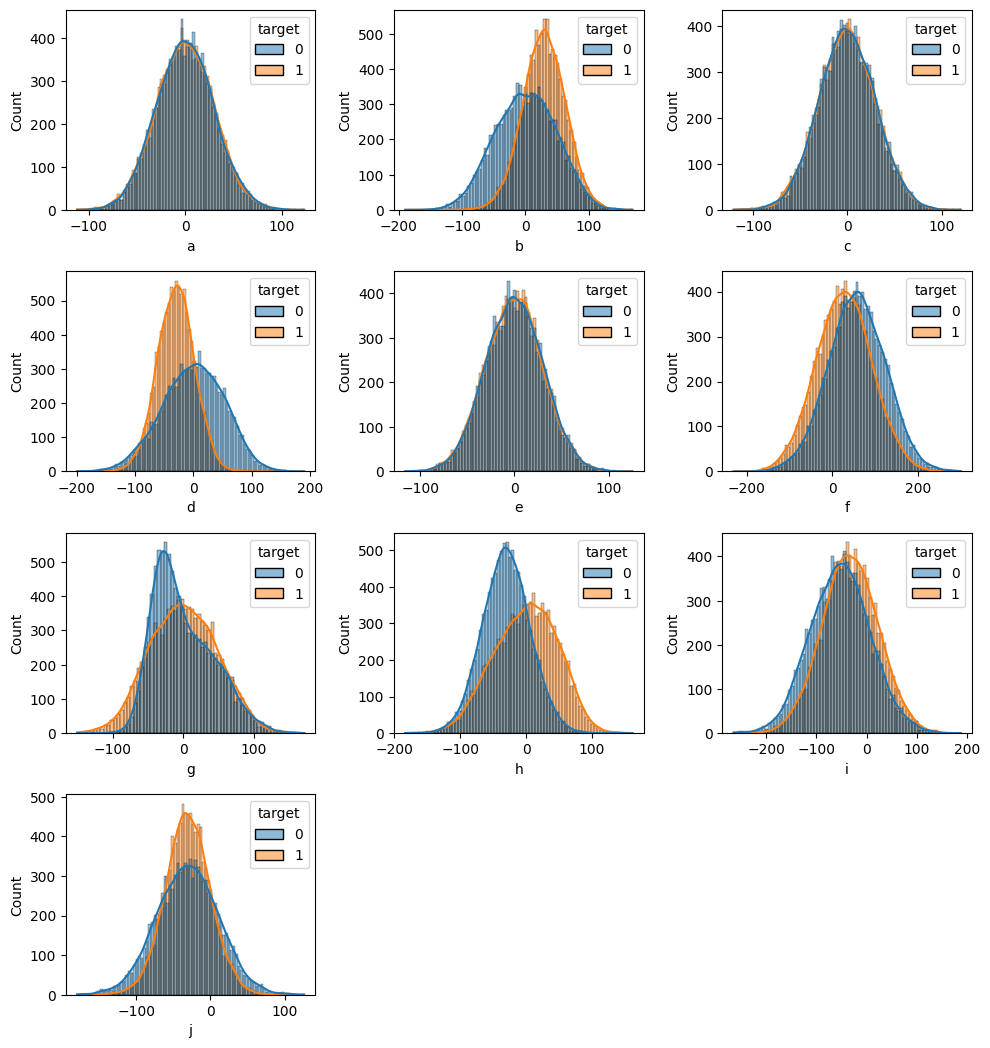

In [12]:
# 2.5 Lets look at the distribution plot of the features:
#     styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

pos = 1
fig = plt.figure(figsize=(10,18));
for i in data.columns[:-1]:      # exclude target
    ax = fig.add_subplot(7,3,pos);
    pos = pos + 1
    _=sns.histplot(data = data, x = i,ax=ax, hue = 'target', kde = 'True');
    plt.tight_layout();

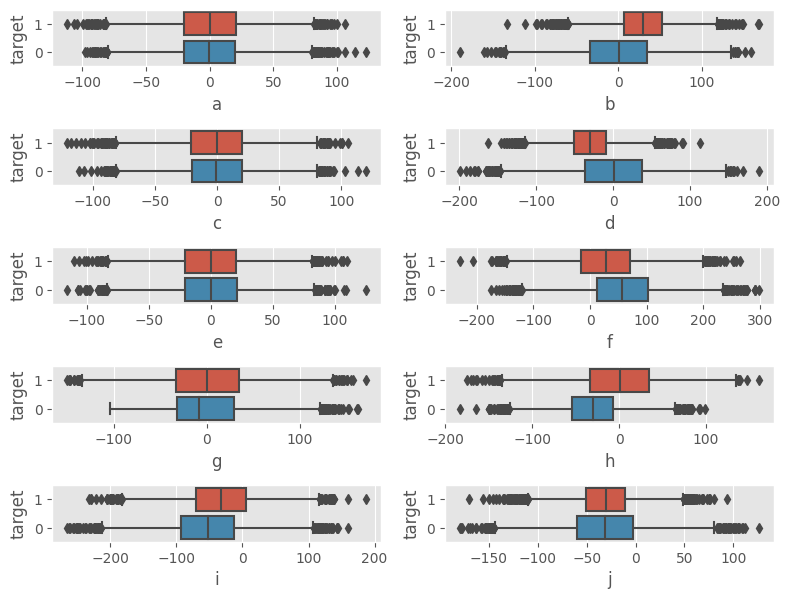

In [13]:
# 2.6 Lets look at relationship of features with target:
#     styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

plt.style.use("ggplot")
df = data.copy()
df['target'] = df['target'].astype('string')
plt.style.use("ggplot")
pos = 1
fig = plt.figure(figsize=(8,8));
for i in df.columns[:-1]:
    ax = fig.add_subplot(7,2,pos);
    pos = pos + 1
    _=sns.boxplot(data=df, x=i, y='target')
    plt.tight_layout();

del(df)

In [14]:
# 2.7 So our best feature are:

best_features = [ 'b','d', 'f','h', 'i', 'g']

## Transform numeric data to categorical
We transform our data as if it were categorical. (of course, such transformation is imperfect.)

To perform our experiments we bin all numeric columns to transform the data to categorical. Binning is performed using pandas `cut()` method. Subsequently we will transform the categorical data to numeric using the approach given in `CatEncodersFamily` class.

While binning, we also split the data: both the numeric (the original) as also the binned datasets. Spliting is performed in stratified manner using `train_test_split()` function of sklearn; `target (y)` is used to stratify. While splitting, for easy comparison, we  see to it that same set of rows occur in `orig_train` and `train_binned` on the one hand and `orig_test` and `test_binned` on the other hand.

In [15]:
# 3.0 Discretise all features of data. And also split dataset.
#     into train/test:

_=data.pop('target')

orig_train, orig_test, train_binned, test_binned  = utils.transformToCatFeatures(data,
                                                                                 y,
                                                                                 bins = 100,
                                                                                 test_size = 0.1,
                                                                                 genColName = False  # Keep orig col names
                                                                                )

In [16]:
# 3.0.1 Check  original data:
#       It has target col also:

orig_train.shape     # (18000, 11)
print("\n======\n")
orig_train.head(3)
orig_test.head(3)


(18000, 11)

,a,b,c,d,e,f,g,h,i,j,target
14601,18.281553,14.936885,-21.296770,92.580955,-0.281517,-53.194531,16.434967,29.077790,51.795634,12.315792,0
9414,-32.229678,37.590245,11.433378,-61.645306,57.690559,73.862507,0.119026,-42.891752,-78.956146,-36.590050,1
10568,3.775668,62.334142,9.435746,60.794409,-55.322841,13.717039,40.109448,-41.858608,-19.155736,2.956130,0


,a,b,c,d,e,f,g,h,i,j,target
1417,-4.703806,81.812304,-31.489410,-49.051118,-43.783805,-52.433265,-10.278629,33.316625,27.920059,12.502724,1
1864,-17.485890,24.062974,-23.363426,-34.479104,-13.858496,-26.440875,-41.991751,43.448550,14.229908,-12.517347,1
16095,24.562586,-41.343470,-22.530112,-44.947555,-28.238219,89.677553,-56.855522,-17.700400,-80.633137,-59.842489,0


In [17]:
# 3.0.2 Check discretised features
#       Note the row-indices of train/test data
#       and compare with those in the above cell.

train_binned.shape      # (18000, 11)
print("\n========\n")
train_binned.head(3)
test_binned.head(3)

(18000, 11)

,a,b,c,d,e,f,g,h,i,j,target
14601,456,858,1242,1676,2048,2434,2852,3262,3671,4063,0
9414,434,864,1255,1636,2072,2458,2847,3241,3642,4047,1
10568,450,871,1255,1667,2026,2447,2860,3242,3655,4060,0


,a,b,c,d,e,f,g,h,i,j,target
1417,446,876,1238,1639,2030,2434,2844,3263,3665,4063,1
1864,441,860,1241,1643,2043,2439,2834,3266,3662,4055,1
16095,459,842,1241,1640,2037,2461,2830,3249,3641,4040,0


In [18]:
# 3.1 Pop out targets:

ytr = train_binned.pop('target')
yte = test_binned.pop("target")

In [28]:
# 3.2  Let us also copy our original and binned
#      files to a local folder
#       We will later copy them to gfrive:


train_binned['target'] = ytr
test_binned['target'] = yte

destination = Path("/content/datafiles/data/")
destination.mkdir(parents=True, exist_ok=True)

trfile = destination / "train_binned.pkl"
tefile = destination / "test_binned.pkl"
ortrfile = destination / "orig_train.pkl"
ortefile = destination / "orig_test.pkl"

train_binned.to_pickle(trfile)
test_binned.to_pickle(tefile)
orig_train.to_pickle(ortrfile)
orig_test.to_pickle(ortefile)

## Transform categorical data to numeric
We use `CatEncodersFamily` class for transformation:

In [21]:
## 4.0 Developing models
#      Decide our cat_cols


cat_cols = best_features  # We consider all here
len(cat_cols)  # 6


# 4.1 Keep interacting cat columns, same
#     as cat columns:

interactingCatCols = cat_cols   # Or just []

6

In [23]:
# 5.0 Instantiate 'CatEncodersFamily' class:

ct = CatEncodersFamily(
                       cMeasures=[1,1,1,1,None,1,1],
                       saveGraph = True,
                       )

# 5.1 Fit it using only 'train_binned' dataset.
#     While fitting, 'target' is not needed:


ct.fit(train_binned, cat_cols, interactingCatCols)

Folder  /content/allmodels/models created to deposit cat encoder models and graph related files
Record set no is 1  
Set of records is:  [('b', 'd', [1, 1, 1, 1, None, 1, 1]), ('b', 'f', [1, 1, 1, 1, None, 1, 1]), ('b', 'h', [1, 1, 1, 1, None, 1, 1]), ('b', 'i', [1, 1, 1, 1, None, 1, 1]), ('b', 'g', [1, 1, 1, 1, None, 1, 1]), ('b', 'b_p_d', [1, 1, 1, 1, None, 1, 1]), ('b', 'b_p_i', [1, 1, 1, 1, None, 1, 1]), ('b', 'd_p_i', [1, 1, 1, 1, None, 1, 1]), ('b', 'b_p_h', [1, 1, 1, 1, None, 1, 1]), ('b', 'f_p_i', [1, 1, 1, 1, None, 1, 1]), ('b', 'd_p_g', [1, 1, 1, 1, None, 1, 1]), ('b', 'f_p_h', [1, 1, 1, 1, None, 1, 1]), ('b', 'h_p_i', [1, 1, 1, 1, None, 1, 1]), ('b', 'h_p_g', [1, 1, 1, 1, None, 1, 1]), ('b', 'b_p_f', [1, 1, 1, 1, None, 1, 1]), ('b', 'f_p_g', [1, 1, 1, 1, None, 1, 1]), ('b', 'd_p_h', [1, 1, 1, 1, None, 1, 1]), ('b', 'i_p_g', [1, 1, 1, 1, None, 1, 1]), ('b', 'b_p_g', [1, 1, 1, 1, None, 1, 1]), ('b', 'd_p_f', [1, 1, 1, 1, None, 1, 1]), ('d', 'b', [1, 1, 1, 1, None, 1, 1]), ('d'

CatEncodersFamily(cMeasures=[1, 1, 1, 1, None, 1, 1],
                  modelsPath=PosixPath('/content/allmodels/models'),
                  pathToStoreProgress=PosixPath('/content/allmodels/progress'),
                  saveGraph=True)

## Data transformation:

In [24]:
# 6.0 Transform both 'test_binned' and 'train_binned' data:
#     Takes time....

test_trans = ct.transform(test_binned[cat_cols])

f"Transformed test data shape: {test_trans.shape}"



====Reading all model-dicts from RAM


====All saved model-dicts read! Model files are intact!
====Total model-dict are:  600
====Sending model loading progress to file: /content/allmodels/progress/load_stored_models.txt
When loading is in progress, open this file with notepad++ AND NOT with notepad


Current mem usage is: 7.737808 MB
Mem usage after dtype transformation is: 3.897808 MB


'Transformed test data shape: (2000, 486)'

In [25]:
# 6.0.1 Transform train_binned now:
#       Takes time....

train_trans= ct.transform(train_binned[cat_cols])

f"Transformed train data shape: {train_trans.shape}"



====Reading all model-dicts from RAM


====All saved model-dicts read! Model files are intact!
====Total model-dict are:  600
====Sending model loading progress to file: /content/allmodels/progress/load_stored_models.txt
When loading is in progress, open this file with notepad++ AND NOT with notepad


Current mem usage is: 69.401808 MB
Mem usage after dtype transformation is: 34.841808 MB


'Transformed train data shape: (18000, 486)'

Our new features are substantially difft from original features. Prefixes to feature names imply as below:
<i>
>deg_ ===> This feature results from calculation of degree centrality<br>
>eig_ ===> This feature results from calculation of eigenvector centrality<br>
>pr_  ===> This feature results from calculation of page rank centrality<br>
>bet_ ===> This feature results from calculation of betweenness centrality<br>
>clu_ ===> This feature results from calculation of clustering characteristics<br>,</i>


In [26]:
# 6.1 Observe data now:
#     It also has original binned cols (10):

train_trans.head()
test_trans.head()

,b,d,f,h,i,g,deg_b_ck_d,eig_b_ck_d,pr_b_ck_d,clu_b_ck_d,...,pr_g_ck_d_p_h,clu_g_ck_d_p_h,bet_g_ck_d_p_h,eig_g_ck_i_p_g,eig_g_ck_b_p_g,deg_g_ck_d_p_f,eig_g_ck_d_p_f,pr_g_ck_d_p_f,clu_g_ck_d_p_f,bet_g_ck_d_p_f
0,858,1676,2434,3262,3671,2852,0.943182,0.113965,0.012207,0.939465,...,0.012985,0.816667,0.005105,0.143638,-0.093073,0.886598,0.121277,0.013356,0.783584,0.007458
1,864,1636,2458,3241,3642,2847,0.943182,0.113965,0.012207,0.939465,...,0.014284,0.744721,0.013769,-0.007618,-0.098035,0.845361,0.119668,0.012650,0.841614,0.004105
2,871,1667,2447,3242,3655,2860,0.931818,0.112948,0.012071,0.945799,...,0.012625,0.837390,0.003627,0.192058,-0.102220,0.865979,0.120483,0.013014,0.811819,0.005925
3,881,1659,2448,3233,3652,2874,0.863636,0.106248,0.011289,0.974035,...,0.011067,0.938193,0.000704,-0.106987,0.110597,0.742268,0.110056,0.011151,0.924491,0.001101
4,868,1649,2446,3258,3655,2860,0.943182,0.113965,0.012207,0.939465,...,0.012625,0.837390,0.003627,0.192058,-0.102220,0.865979,0.120483,0.013014,0.811819,0.005925


,b,d,f,h,i,g,deg_b_ck_d,eig_b_ck_d,pr_b_ck_d,clu_b_ck_d,...,pr_g_ck_d_p_h,clu_g_ck_d_p_h,bet_g_ck_d_p_h,eig_g_ck_i_p_g,eig_g_ck_b_p_g,deg_g_ck_d_p_f,eig_g_ck_d_p_f,pr_g_ck_d_p_f,clu_g_ck_d_p_f,bet_g_ck_d_p_f
0,876,1639,2434,3263,3665,2844,0.931818,0.112948,0.012071,0.945799,...,0.013735,0.773109,0.008771,-0.074045,-0.117299,0.876289,0.121254,0.013149,0.802241,0.006136
1,860,1643,2439,3266,3662,2834,0.954545,0.114552,0.012358,0.926277,...,0.013113,0.812406,0.005019,0.168998,0.146096,0.865979,0.120532,0.013012,0.812392,0.005864
2,842,1640,2461,3249,3641,2830,0.943182,0.113965,0.012207,0.939465,...,0.013759,0.764486,0.011211,0.174556,0.092070,0.876289,0.120475,0.013217,0.792437,0.007147
3,848,1647,2457,3248,3645,2838,0.943182,0.113965,0.012207,0.939465,...,0.013793,0.769468,0.009801,-0.081183,0.088561,0.907216,0.122539,0.013661,0.763062,0.008433
4,859,1647,2448,3258,3653,2834,0.943182,0.113965,0.012207,0.939465,...,0.013113,0.812406,0.005019,0.168998,0.146096,0.865979,0.120532,0.013012,0.812392,0.005864


In [27]:
# 6.2 Pop out target:

_= orig_train.pop('target')
_= orig_test.pop('target')

## Make an archive of files in gdrive
This is for later use


In [ ]:
# 6.2 Mount google drive:

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### Archive of graph files to gdrive

In [29]:
# 6.2.1 Delete if a folder already exists on gdrive:
outputfolder = Path("/gdrive/MyDrive/Colab_data_files/models/")
if outputfolder.exists() and outputfolder.is_dir():
    shutil.rmtree(outputfolder)  # Delete if it exists

In [30]:
# 6.3 Archive folder where graph files are stored to gdrive
output_filename = outputfolder / "models"
dir_to_be_archived = "/content/allmodels/models/"
shutil.make_archive(output_filename, 'zip', dir_to_be_archived )


# 6.3.2 Unpack the zipped file at gdrive now:
shutil.unpack_archive(str(output_filename) +".zip", output_filename, 'zip')

'/gdrive/MyDrive/Colab_data_files/models/models.zip'

In [31]:
# 6.4 Let us have a look at our list of (graph) stored files:
p = Path(r'/gdrive/MyDrive/Colab_data_files/models/models').glob('**/*')
files = [x for x in p if x.is_file()]
files[:3]

[PosixPath('/gdrive/MyDrive/Colab_data_files/models/models/h_bigraph_b_p_i.gml'),
 PosixPath('/gdrive/MyDrive/Colab_data_files/models/models/g_bigraph_b_p_g.gml'),
 PosixPath('/gdrive/MyDrive/Colab_data_files/models/models/g_bigraph_h.gml')]

### Archive of datafiles

In [32]:
# 6.5 Delete if a folder already exists on gdrive:
outputfolder = Path("/gdrive/MyDrive/Colab_data_files/datafiles/")
if outputfolder.exists() and outputfolder.is_dir():
    shutil.rmtree(outputfolder)  # Delete if it exists

In [33]:
# 6.5.1 Archive folder where pickle files are stored to gdrive
output_filename = outputfolder / "data"
dir_to_be_archived = "/content/datafiles/data/"
shutil.make_archive(output_filename, 'zip', dir_to_be_archived )



# 6.6 Unpack the zipped file now:
shutil.unpack_archive(str(output_filename)+".zip", output_filename, 'zip')

'/gdrive/MyDrive/Colab_data_files/datafiles/data.zip'

In [34]:
# 6.7 Let us have a look at our list of pickled files:
p = Path(r'/gdrive/MyDrive/Colab_data_files/datafiles/data').glob('**/*')
files = [x for x in p if x.is_file()]
files

[PosixPath('/gdrive/MyDrive/Colab_data_files/datafiles/data/orig_train.pkl'),
 PosixPath('/gdrive/MyDrive/Colab_data_files/datafiles/data/train_binned.pkl'),
 PosixPath('/gdrive/MyDrive/Colab_data_files/datafiles/data/test_binned.pkl'),
 PosixPath('/gdrive/MyDrive/Colab_data_files/datafiles/data/orig_test.pkl')]

In [ ]:
# 6.8 Pop out target, if it exists:

_= orig_train.pop('target')
_= orig_test.pop('target')

## PCA with original data and transformed data:
We perform PCA of transformed data with all features. We latter perform PCA again but only with important features.

In [36]:
# 7.0 PCA with original train data:

pca = PCA(n_components = 2,  whiten= True, random_state= None)
ss= StandardScaler()
orig_pca = pca.fit_transform(ss.fit_transform(orig_train[best_features]))
orig_pca.shape

(18000, 2)

In [38]:
# 7.1 PCA with transformed train data.
#     Drop all cat_cols first:

trans_pca = train_trans.iloc[:,len(best_features):]   # Drop the six binned columns
pca = PCA(n_components= 2, whiten= True, random_state = None)
ss = StandardScaler()
trans_pca = pca.fit_transform(ss.fit_transform(trans_pca))
trans_pca.shape  # (18000, 2)

(18000, 2)

In [39]:
# 7.2 Assign column names and transform to DataFrame;

colnames = ["pc" + str(i) for i in range(orig_pca.shape[1])]
orig_pca  = pd.DataFrame(orig_pca, columns = colnames)
trans_pca = pd.DataFrame(trans_pca, columns = colnames)

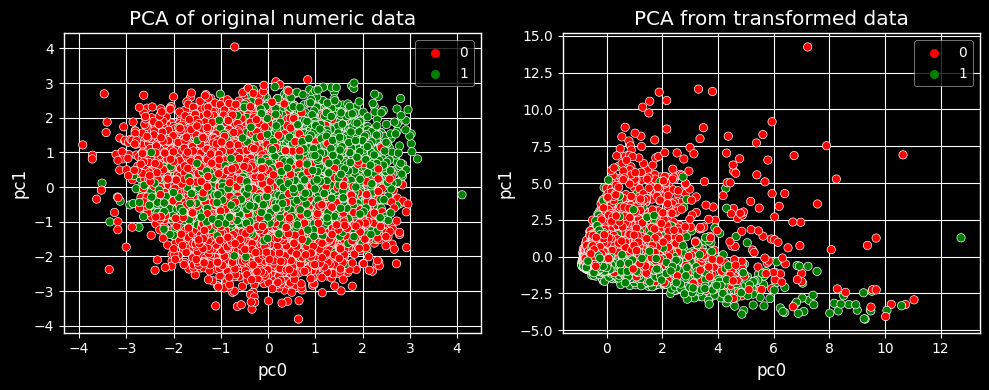

In [44]:
# 8.1 2D PCA plot from original train data:
fig = plt.figure(figsize = (10,4));
fig.add_subplot(1,2,1);
plt.style.use("dark_background");
sns.scatterplot(data = orig_pca ,
                x= 'pc0',
                y = 'pc1',
                hue = ytr.values,
                palette = ["red", "green", "white"]
                ).set(title='PCA of original numeric data');

# 8.2 2D PCA plot from transformed train data:
fig.add_subplot(1,2,2);
sns.scatterplot(data = trans_pca,
                x= 'pc0',
                y = 'pc1',
                hue = ytr.values,
                palette = ["red", "green", "white"]
                ).set(title='PCA from transformed data') ;

plt.tight_layout();


## xgboost modeling:
With all features

In [45]:
# 9.0 Original train/test data:

model_orig = xgb.XGBClassifier( n_estimators= 200,
                               verbosity = 3,
                               eta = 0.06,
                               max_depth = 6,
                               subsample = 0.8,
                               random_state = None,
                              )

# 9.0.1
tr_X =   orig_train[best_features]
test_X = orig_test[best_features]
ytr = ytr
yte = yte

# 9.0.2
model_orig.fit(tr_X, ytr.values,
               early_stopping_rounds = 70,
               eval_set=[ (tr_X, ytr.values), (test_X, yte.values)],
               eval_metric = ['auc']
              )



[09:28:55] DEBUG: ../src/gbm/gbtree.cc:157: Using tree method: 2
[09:28:55] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 0 pruned nodes, max_depth=6
[0]	validation_0-auc:0.92519	validation_1-auc:0.91215
[09:28:55] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=6
[1]	validation_0-auc:0.93685	validation_1-auc:0.92222
[09:28:56] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=6
[2]	validation_0-auc:0.93943	validation_1-auc:0.92450
[09:28:56] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=6
[3]	validation_0-auc:0.94237	validation_1-auc:0.92687
[09:28:56] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=6
[4]	validation_0-auc:0.94382	validation_1-auc:0.92864
[09:28:56] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 pruned nodes,

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.06, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [46]:
# 9.1 Scores:

f"Best auc from orig train/test data: {model_orig.best_score}"
print("\n===========\n")
f"Best iteration from orig train/test data: {model_orig.best_iteration}"

'Best auc from orig train/test data: 0.9647919647919648'

'Best iteration from orig train/test data: 188'

In [47]:
# 9.2 Modeling with transformed train/test data:

model_trans = xgb.XGBClassifier( n_estimators= 350,
                                verbosity = 3,
                                eta = 0.06,
                                max_depth = 14,
                                subsample = 0.8,
                                random_state = None,
                           )

# 9.21
tr_X =   train_trans.iloc[:,len(best_features):]
test_X = test_trans.iloc[:,len(best_features):]
ytr = ytr
yte = yte

# 9.22
model_trans.fit(tr_X, ytr.values,
          early_stopping_rounds = 60,
          eval_set=[ (tr_X, ytr.values), (test_X, yte.values)],
          eval_metric = ['auc']
          )



[09:29:36] DEBUG: ../src/gbm/gbtree.cc:157: Using tree method: 2
[09:29:37] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 1314 extra nodes, 0 pruned nodes, max_depth=14
[0]	validation_0-auc:0.96558	validation_1-auc:0.89322
[09:29:38] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 1102 extra nodes, 0 pruned nodes, max_depth=14
[1]	validation_0-auc:0.98037	validation_1-auc:0.90940
[09:29:39] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 1108 extra nodes, 0 pruned nodes, max_depth=14
[2]	validation_0-auc:0.98405	validation_1-auc:0.91699
[09:29:40] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 1160 extra nodes, 0 pruned nodes, max_depth=14
[3]	validation_0-auc:0.98627	validation_1-auc:0.91991
[09:29:41] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 1184 extra nodes, 0 pruned nodes, max_depth=14
[4]	validation_0-auc:0.98824	validation_1-auc:0.92447
[09:29:42] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 1184 extra nodes, 0 pr

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.06, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=14,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=350, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

### Learning curve plots

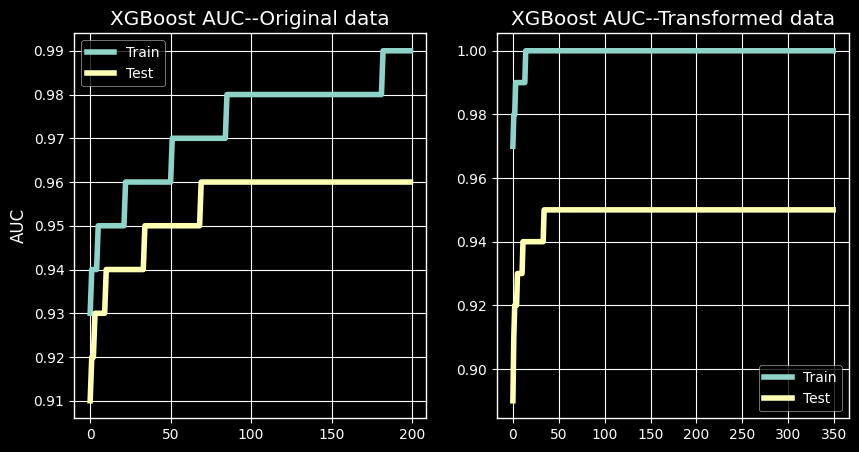

In [50]:
# 9.3 Modeling with original data:

# Ref: https://stackoverflow.com/a/60366515
fig, ax = plt.subplots(1,2, figsize = (10,5));

results = model_orig.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0,epochs)
ax[0].plot(x_axis, np.round(results['validation_0']['auc'],2),linewidth=4, label='Train');
ax[0].plot(x_axis, np.round(results['validation_1']['auc'],2), linewidth=4, label='Test');
ax[0].legend();
ax[0].set_ylabel('AUC');
ax[0].set_title("XGBoost AUC--Original data")

# 9.4 Modeling with transformed data:

results = model_trans.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0,epochs)
ax[1].plot(x_axis, np.round(results['validation_0']['auc'],2), linewidth=4, label='Train');
ax[1].plot(x_axis, np.round(results['validation_1']['auc'],2), linewidth=4, label='Test');
ax[1].legend();
ax[1].set_title('XGBoost AUC--Transformed data');
plt.show();

In [51]:
# 9.5
f"Best auc from transformed train/test data: {model_trans.best_score}"
print("\n===========\n")
f"Best iteration from transformed train/test data: {model_trans.best_iteration}"

'Best auc from transformed train/test data: 0.9531679531679532'

'Best iteration from transformed train/test data: 348'

## Feature importance of transformed data
Extract feature importance using function `utils.xgImptFeatures()`. The function outputs three objects as follows::
>`fe_1`: List of columns arranged in order of descending xgboost impt(feat-impt >0)<br>
>`fe_0`: List of columns whose xgboost importance is zero<br>
>`fe`: One-column dataframe of feature importance(top-down). Col name is 'imp'<br>

In [52]:
# 10.0 Get feature importance:
#      fe: Sorted Pandas DataFrame with column name and top-down feature impt

fe_1, fe_0, fe = utils.xgImptFeatures(model_trans,  train_trans.iloc[:,len(cat_cols):].columns)
print("\n=== DataFrame  of impt features top-down =======\n")
fe.iloc[:5]
print("\n\n== Column-list whose feat impt >0 =======\n")
fe_1[:5]     # Arranged in descending order of impt
print("\n\n===Column-list whose feat impt is 0 =======\n")
fe_0[:5]


Order of feature importance is by 'gain'

=== DataFrame  of impt features top-down =======



,imp
eig_d_ck_b,0.115450
pr_b_ck_h_p_i,0.037878
bet_h_ck_b,0.029132
clu_h_ck_b,0.015399
eig_f_ck_b_p_i,0.014839




== Column-list whose feat impt >0 =======



['eig_d_ck_b', 'pr_b_ck_h_p_i', 'bet_h_ck_b', 'clu_h_ck_b', 'eig_f_ck_b_p_i']



===Column-list whose feat impt is 0 =======



['bet_h_ck_g', 'clu_g_ck_b', 'bet_d_ck_g', 'clu_g_ck_f', 'clu_d_ck_g']

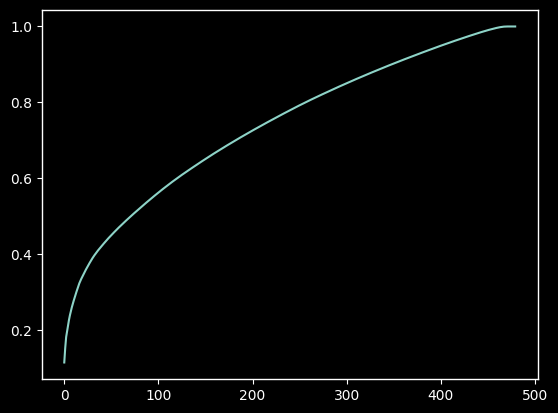

In [53]:
# 10.1 Cumulative sum of feature importance.
#      Last 100 columns have zero or (near zero)
#      importance:

plt.plot(range(len(fe)), fe['imp'].cumsum().values);
plt.grid();

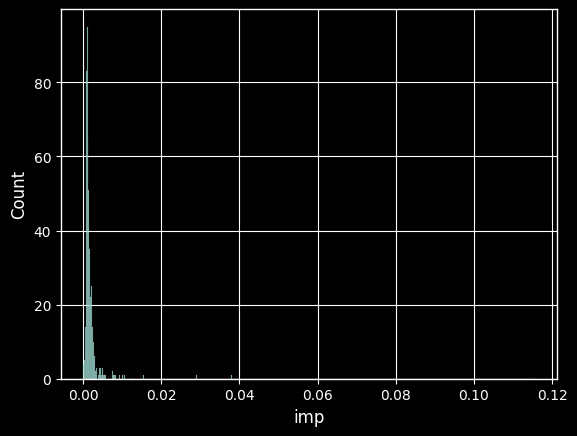

In [54]:
# 10.2 A histogram plot of feature importance score
#      Most columns have feature impt much below 0.01

sns.histplot(fe['imp'][fe_1]);

### XGBoost modeling with impt features

In [64]:
# 11.0 Modeling of transformed train/test data with impt features:

if 'model_trans_impt' in globals():
    del model_trans_impt


model_trans_impt = xgb.XGBClassifier( n_estimators= 300,
                                      verbosity = 3,
                                      eta = 0.06,
                                      max_depth = 14,
                                      subsample = 0.8,
                                      random_state = None,
                           )

# 11.0.1
tr_X =   train_trans[fe_1[:40]]
test_X = test_trans[fe_1[:40]]
ytr = ytr
yte = yte


# 11.0.2
model_trans_impt.fit(tr_X, ytr.values,
          early_stopping_rounds = 80,
          eval_set=[ (tr_X, ytr.values), (test_X, yte.values)],
          eval_metric = ['auc']
          )



[09:43:22] DEBUG: ../src/gbm/gbtree.cc:157: Using tree method: 2
[09:43:22] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 1286 extra nodes, 0 pruned nodes, max_depth=14
[0]	validation_0-auc:0.96010	validation_1-auc:0.90992
[09:43:23] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 1128 extra nodes, 0 pruned nodes, max_depth=14
[1]	validation_0-auc:0.97099	validation_1-auc:0.91868
[09:43:23] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 1090 extra nodes, 0 pruned nodes, max_depth=14
[2]	validation_0-auc:0.97502	validation_1-auc:0.92548
[09:43:23] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 1200 extra nodes, 0 pruned nodes, max_depth=14
[3]	validation_0-auc:0.97780	validation_1-auc:0.92736
[09:43:23] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 1128 extra nodes, 0 pruned nodes, max_depth=14
[4]	validation_0-auc:0.97934	validation_1-auc:0.92924
[09:43:23] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 1182 extra nodes, 0 pr

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.06, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=14,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

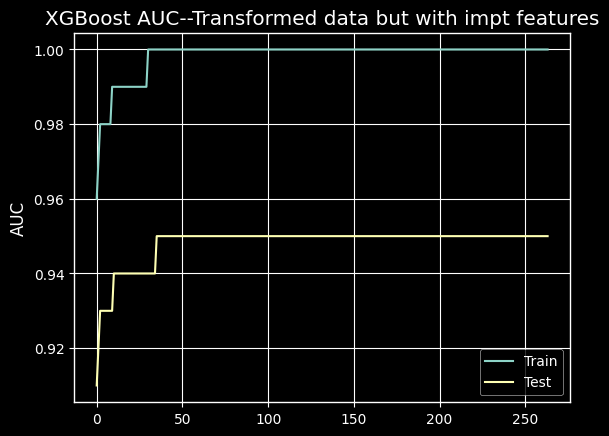

In [65]:
# 11.1 Learning curve: Modeling with transformed data:
#      We get results better than with all features:

results = model_trans_impt.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)
fig, ax = plt.subplots();
ax.plot(x_axis, np.round(results['validation_0']['auc'],2), label='Train');
ax.plot(x_axis, np.round(results['validation_1']['auc'],2), label='Test');
ax.legend();
plt.ylabel('AUC');
plt.title('XGBoost AUC--Transformed data but with impt features');
plt.show();

## PCA with original data and transformed data:
While performing PCA, we only use impt features

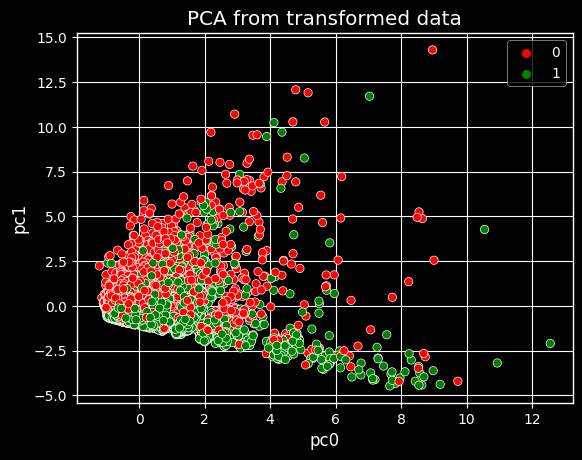

In [66]:
# 11.2 2D PCA with transformed train data.
#       Only with impt features:

trans_pca = train_trans[fe_1[:40]]   # Drop the six binned columns
pca = PCA(n_components= 2, whiten= True, random_state = None)
ss = StandardScaler()
trans_pca = pca.fit_transform(ss.fit_transform(trans_pca))
trans_pca.shape

# Assign column names and transform to DataFrame;

colnames = ["pc" + str(i) for i in range(trans_pca.shape[1])]
trans_pca = pd.DataFrame(trans_pca, columns = colnames)

# PCA plot from impt transformed data:

plt.style.use("dark_background")
sns.scatterplot(data = trans_pca,
                x= 'pc0',
                y = 'pc1',
                hue = ytr.values,
                palette = ["red", "green", "white"]
                ).set(title='PCA from transformed data') ;

## Correlation with orig columns
Correlation of extracted features with original features

In [67]:
# 13.0 Take top five imp features:

tt = train_trans[fe_1[:5]].copy()
tt.shape  # (9000,341)

(18000, 5)

In [68]:
# 13.1 Reindex orig_train and merge with 'tt':

ot= orig_train.reset_index(drop = True).copy()
result = ot.merge(tt, left_index = True, right_index=True )


Correlation heatmap shows some amount of correlation between the two sets of features

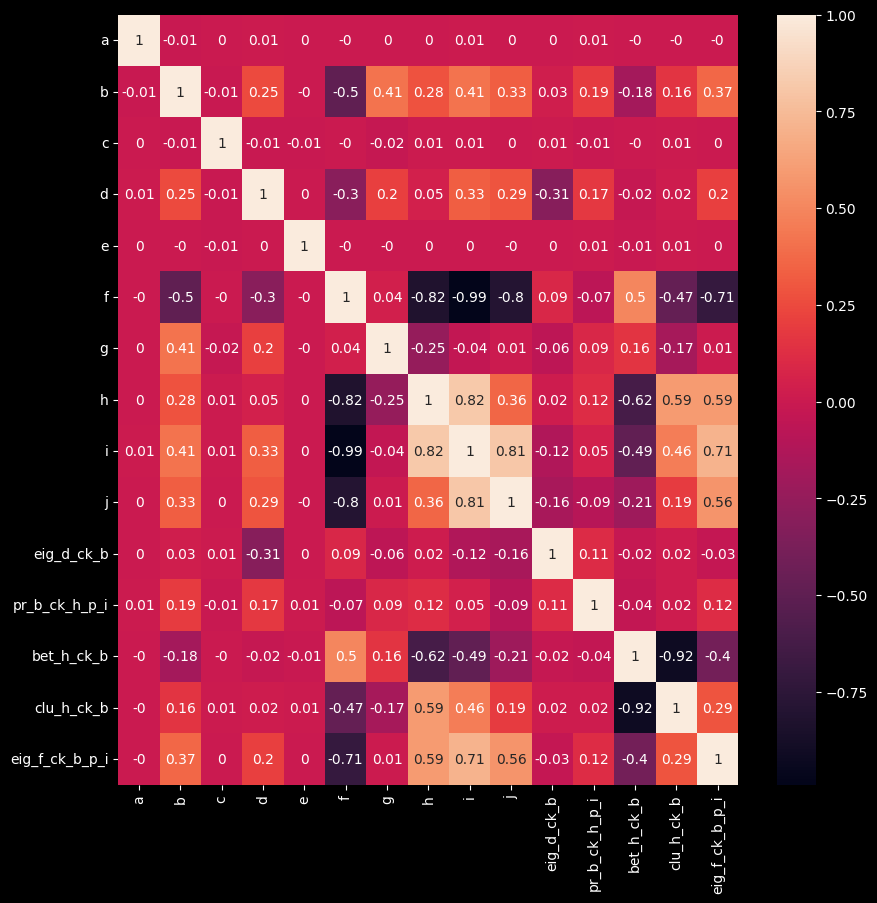

In [70]:
# 13.2 Correlation heatmap:

plt.figure(figsize = (10,10))
sns.heatmap(np.round(result.corr(),2), annot = True);

## Distribution of columns
Distribution of columns related to different centrality measures

### Proportion of columns by centrality measure:

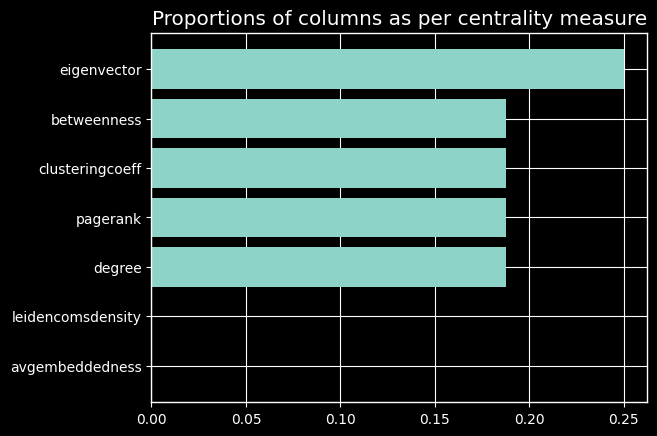

In [71]:
# 14.0 Our list of columns

colList = (train_trans.iloc[:,len(cat_cols):]).columns

# Count of columns by centrality measure and its plot:
f = utils.featureImptByCentFeatCounts(colList, normalize = True)
utils.plotSeries(f, "Proportions of columns as per centrality measure")

### Proportions of columns by centrality whose impt is > 0

In [72]:
# 14.1 Extract column importance:

fe_1, fe_0,_ = utils.xgImptFeatures(model_trans, colList)
f"Columns whose impt is >0: {len(fe_1)}"
print("\n")
f"Columns whose impt is 0: {len(fe_0)}"


Order of feature importance is by 'gain'


'Columns whose impt is >0: 471'

'Columns whose impt is 0: 9'

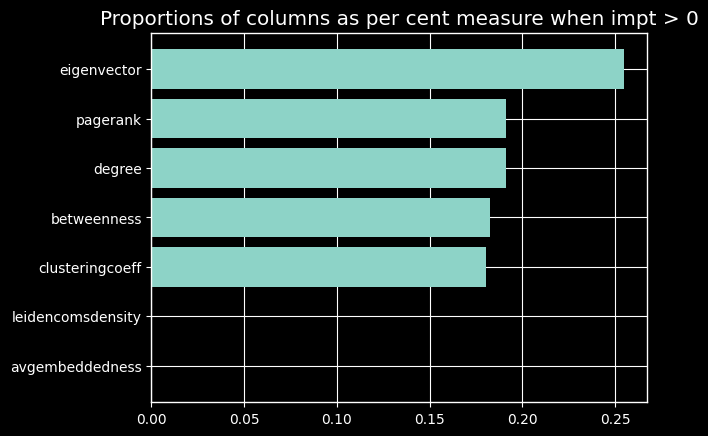

In [73]:
# 14.2 Count of columns whose xgboost impt > 0 by centrality measure and its plot:
f = utils.featureImptByCentFeatCounts(fe_1, normalize = True)
utils.plotSeries(f, "Proportions of columns as per cent measure when impt > 0")

### Proportions of columns by summed-up importance score of each centrality measure

In [74]:
# 15.0 Extract xgboost feature importance:
fe_1, _, fe = utils.xgImptFeatures(model_trans, colList)



Order of feature importance is by 'gain'


In [75]:
# 15.1 Column-wise importance score (whose impt > 0)
#      score is a Pandas Series
score = fe['imp'][fe_1]

# 15.2 Score of all impt columns:
score

eig_d_ck_b        0.115450
pr_b_ck_h_p_i     0.037878
bet_h_ck_b        0.029132
clu_h_ck_b        0.015399
eig_f_ck_b_p_i    0.014839
                    ...   
clu_h_ck_g        0.000310
bet_i_ck_g        0.000279
clu_i_ck_g        0.000163
clu_d_ck_h        0.000158
eig_f_ck_g        0.000092
Name: imp, Length: 471, dtype: float32

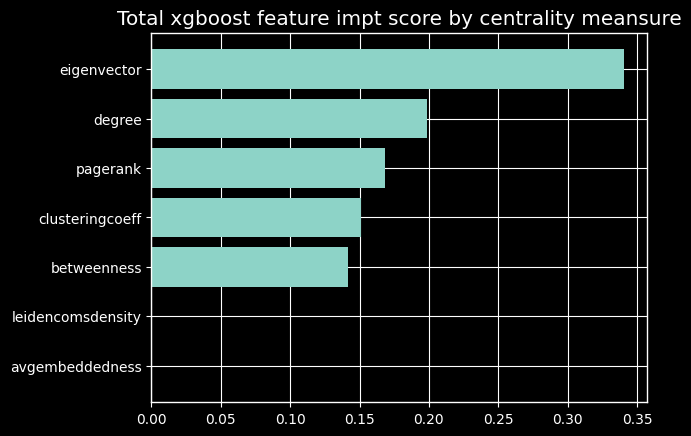

In [76]:
# 15.3 Extract and plot total xgboost impt scores by centrality measure:

g = utils.featureImptByScore(score, fe_1, True)
utils.plotSeries(g, "Total xgboost feature impt score by centrality meansure")

## Analysing Graphs

### Read graph files from gdrive

In [85]:
# 15.0 Mount gdrive:

from google.colab import drive
drive.mount('/gdrive')

ValueError: ignored

In [86]:
# 15.1 Path where .gml files are placed:

pathToFolder = Path("/gdrive/MyDrive/Colab_data_files/models/models")
filelist = sorted(list(pathToFolder.iterdir()))
filelist[:5]   # a_bigraph_*

[PosixPath('/gdrive/MyDrive/Colab_data_files/models/models/b_bigraph_b_p_d.gml'),
 PosixPath('/gdrive/MyDrive/Colab_data_files/models/models/b_bigraph_b_p_f.gml'),
 PosixPath('/gdrive/MyDrive/Colab_data_files/models/models/b_bigraph_b_p_g.gml'),
 PosixPath('/gdrive/MyDrive/Colab_data_files/models/models/b_bigraph_b_p_h.gml'),
 PosixPath('/gdrive/MyDrive/Colab_data_files/models/models/b_bigraph_b_p_i.gml')]

### Read data files from gdrive:

In [87]:
# 16.0
orig_test = pd.read_pickle("/gdrive/MyDrive/Colab_data_files/datafiles/data/orig_test.pkl")
orig_train = pd.read_pickle("/gdrive/MyDrive/Colab_data_files/datafiles/data/orig_train.pkl")
train_binned = pd.read_pickle("/gdrive/MyDrive/Colab_data_files/datafiles/data/train_binned.pkl")
test_binned = pd.read_pickle("/gdrive/MyDrive/Colab_data_files/datafiles/data/test_binned.pkl")

In [88]:
# 16.1 check data files:
#      All have 'target' col
orig_train.head(2)
orig_test.head(2)
train_binned.head(2)
test_binned.head(2)

,a,b,c,d,e,f,g,h,i,j
14601,18.281553,14.936885,-21.296770,92.580955,-0.281517,-53.194531,16.434967,29.077790,51.795634,12.315792
9414,-32.229678,37.590245,11.433378,-61.645306,57.690559,73.862507,0.119026,-42.891752,-78.956146,-36.590050


,a,b,c,d,e,f,g,h,i,j
1417,-4.703806,81.812304,-31.489410,-49.051118,-43.783805,-52.433265,-10.278629,33.316625,27.920059,12.502724
1864,-17.485890,24.062974,-23.363426,-34.479104,-13.858496,-26.440875,-41.991751,43.448550,14.229908,-12.517347


,a,b,c,d,e,f,g,h,i,j,target
14601,456,858,1242,1676,2048,2434,2852,3262,3671,4063,0
9414,434,864,1255,1636,2072,2458,2847,3241,3642,4047,1


,a,b,c,d,e,f,g,h,i,j,target
1417,446,876,1238,1639,2030,2434,2844,3263,3665,4063,1
1864,441,860,1241,1643,2043,2439,2834,3266,3662,4055,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Display graphs

In [90]:
# 17.0 Get sample list of projected and bigraphs:

projected = [str(i).split("/")[-1] for i in filelist if 'b_projected' in str(i)]

bigraph = [str(i).split("/")[-1] for i in filelist if 'b_bigraph' in str(i)]
sb = sorted(bigraph, key=len)
sb[:5]   # bigraph files
print("\n\n====\n")
sp = sorted(projected, key=len)
sp[:5]    # projected graph files

['b_bigraph_d.gml',
 'b_bigraph_f.gml',
 'b_bigraph_g.gml',
 'b_bigraph_h.gml',
 'b_bigraph_i.gml']



====



['b_projected_d.gml',
 'b_projected_f.gml',
 'b_projected_g.gml',
 'b_projected_h.gml',
 'b_projected_i.gml']

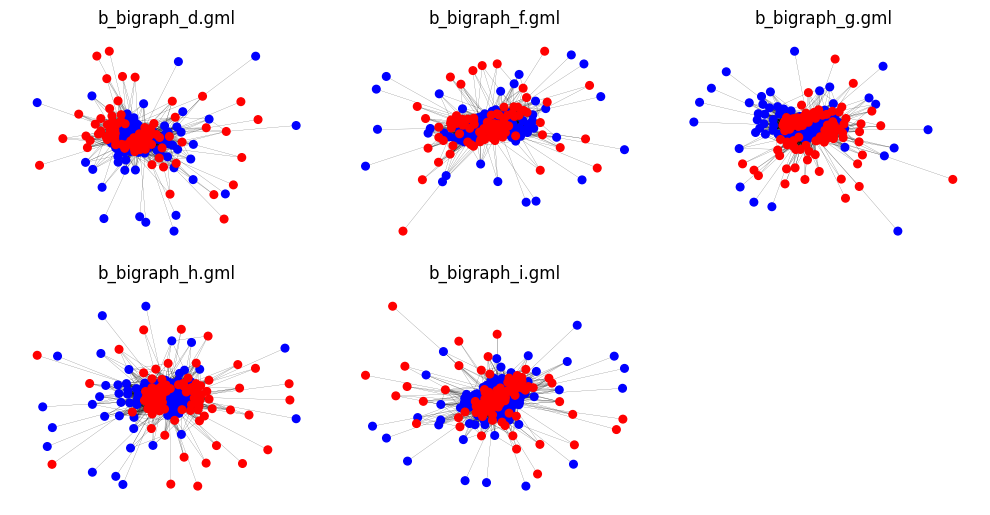

In [91]:
# 17.1 Plot of sample bigraphs:

plt.style.use('default')
pos = 1
fig = plt.figure(figsize=(10,18));
for i in sb[:5]:
    ax = fig.add_subplot(7,3,pos);
    pos = pos + 1
    _=utils.plotBipartiteGraph(i,pathToFolder, ax = ax, title = i, connected = True);
    plt.tight_layout();

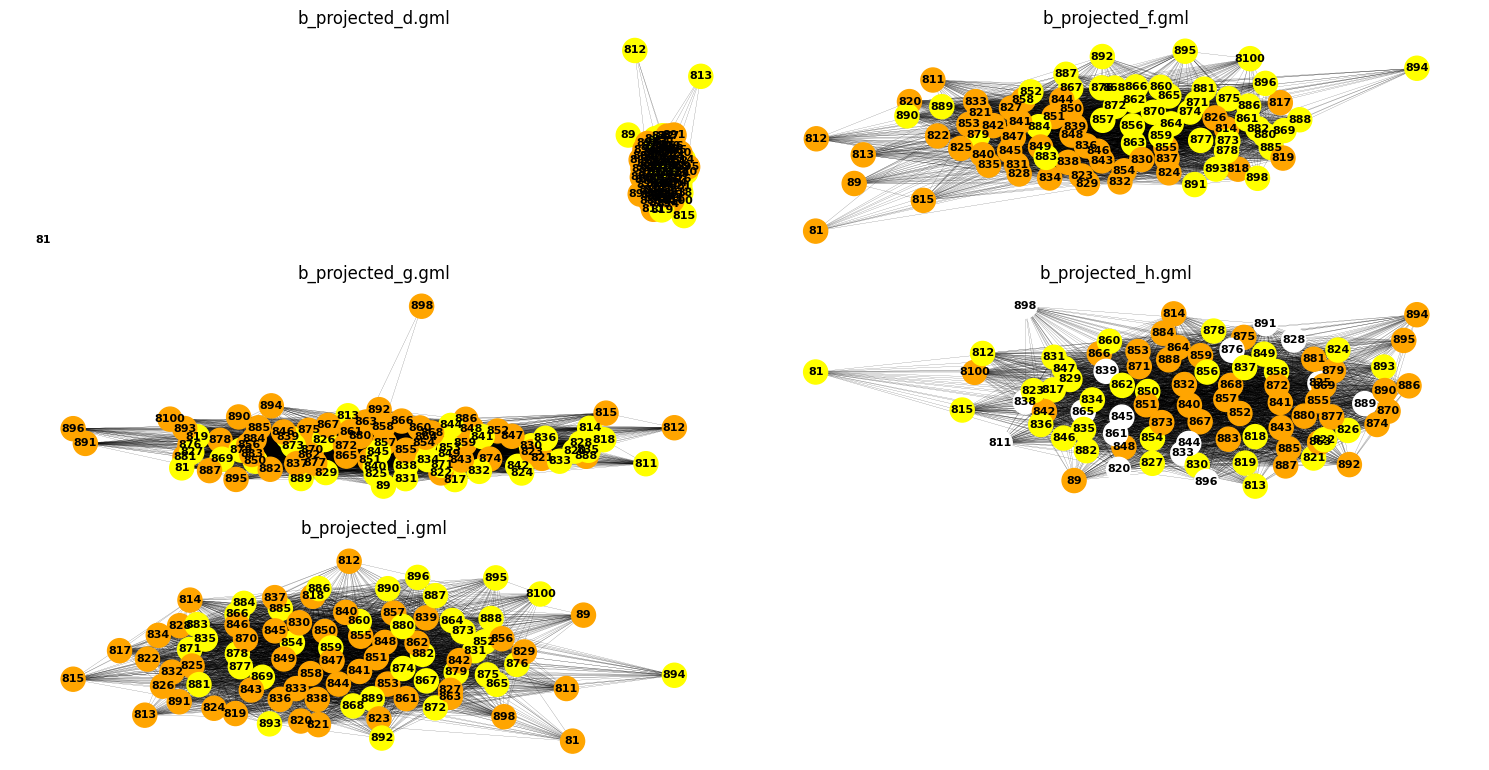

In [92]:
# 17.2 Plot of sample projected graph files
#      And community visualization within them
#      Modularity class is used to distinguish
#      communities:

plt.style.use('default')
pos = 1
fig = plt.figure(figsize=(15,18));
for i in sp[:5]:
    ax = fig.add_subplot(7,2,pos);
    pos = pos + 1
    _=utils.communityVisualization(i,pathToFolder, ax = ax, withLabels = True, title = i);
    plt.tight_layout();

## Transform binned data to communities:

In [98]:
def transformBinnedDF2Communities(columnNames,pathToGraphFolder, train_binned, algo):
    """
    Desc
    -----
    Replace every column in the binned the Dataframe as per network community
    Example binned/discrete dataframe:
            'a'     'b
            --      ---
            434     709
            435     789
            23      710
            78      756

    Replace col 'a' as per communities discovered in network 'a_projected_b.gml':
    434 & 435 belong to one community and 23 & 78 to other.

            'a'     'b'
            ---     ---
             0      709
             0      789
             1      710
             1      756

    Similarly, replace col 'b' as per communities in 'b_projected_a.gml':

            'a'     'b'
            ---     ---
             0      1
             0      0
             1      0
             1      1

    Parameters
    -----------
    columnNames: list of cat cols
    pathToGraphFolder: str: Folder that has graph files
    train_binned: DataFrame with binned/discrete columns
    algo: function object: networkx algorithm to be used to
          discover communities.
          Example: nx.community.greedy_modularity_communities

    Returns
    -------
    map_list: list of dictionaries. Each dictionary maps
              levels in a column to a community
    df: DataFrame: Transformed train_binned DataFrame.
        If train_binned had columns other than columnNames,
        df would not contain those columns


    """

    # 1. From col-names names, create graph filenames:
    # Example: col-names: ['a','b','c']
    # First permute col-names in pairs of two:
    #  p = ('a','b'),('b','a'), ('a','c'),('c','a')...
    p = list(itertools.permutations(columnNames,2))
    # Prepare list of graph files:
    # ('a_projected_b.gml', 'b_projected_a.gml'...)
    filelist = []
    for i in p:
      filelist.append(i[0] + "_projected_" + i[1] + ".gml")

    # 2. For every file in the filelist
    map_list = []  # Start with a blank list of dictionaries
    # df will store dataframe train_binned after each bin-col is mapped
    #
    df = pd.DataFrame()
    for file in filelist:
      # 2.1 Load network
      # Get full filename that includes filepath
      filepath = Path(pathToGraphFolder) / file
      if filepath.is_file():
        # Read the file as a network
	      G = nx.read_gml(filepath)

	      # 2.2 Calculate community classes using algo
	      #    cm_mod contains as many frozensets of nodes
	      #    as there are communities:
        cm_mod = algo(G)

	      # 3.0 We now create dict corresponding to
	      #     all communities in cm_mod
	      #    Example:
	      #                 frozenset1         frozenset2
	      #   cm_mod:      {'434', '435' },    {'23' , '78'}
	      #   fset_dict  {'434': 0, '435' :0, '23' : 1, '78': 1}

	      counter = 0  # Assigns values in dict
	      fset_dict = {}  # Start with blank dict
	      # For every frozenset
	      for i in cm_mod:
		      # For every item in this frozenset
		      for g in i:
		        # Set class to the value of counter
		        fset_dict[g] = counter

		    # Increment counter for next class
		    counter  +=1
	      # Now that map dict for the modularity
	      # classes are ready, append it to map_list
	      map_list.append(fset_dict)

	      # Extract column name from file:
	      colToProject = file.split('_')[0]
	      # Map train_binned column using the dict
	      df[file] = train_binned[colToProject].map(fset_dict)
	      # Continue for loop for the next filelist
    return map_list,df

IndentationError: ignored

In [93]:
# 18.0 Transform each column bin as per the community
#       to which it belongs:

# 18.1 Binnedd cols are:
columnNames = best_features

# 18.2 Communities will be created as per this algo:
algolist = [nx.community.greedy_modularity_communities]

# 18.3 Graph files are within:
pathToGraphFolder= "/gdrive/MyDrive/Colab_data_files/allmodels/models"

# 18.4 Perform transformation of both train_binned and test_binend:
# 18.4.1 List of transformed datframes as per difft algo used
fg_tr = []
fg_te = []

# 18.4.2 PErform transformation to community structure
for algo in algolist:
  _,df_tr = utils.transformBinnedDF2Communities(columnNames,pathToGraphFolder,train_binned,algo)
  _,df_te = utils.transformBinnedDF2Communities(columnNames,pathToGraphFolder,test_binned,algo)
  fg_tr.append(df_tr)
  fg_te.append(df_te)

FileNotFoundError: ignored

In [ ]:
# 18.5 Observe few rows of transformed data:
fg_tr[0].head(5)
fg_te[0].head(5)

,a_projected_b.gml,a_projected_c.gml,a_projected_d.gml,a_projected_e.gml,a_projected_f.gml,b_projected_a.gml,b_projected_c.gml,b_projected_d.gml,b_projected_e.gml,b_projected_f.gml,...,e_projected_a.gml,e_projected_b.gml,e_projected_c.gml,e_projected_d.gml,e_projected_f.gml,f_projected_a.gml,f_projected_b.gml,f_projected_c.gml,f_projected_d.gml,f_projected_e.gml
2414,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0
4213,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4475,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
746,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
852,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0


,a_projected_b.gml,a_projected_c.gml,a_projected_d.gml,a_projected_e.gml,a_projected_f.gml,b_projected_a.gml,b_projected_c.gml,b_projected_d.gml,b_projected_e.gml,b_projected_f.gml,...,e_projected_a.gml,e_projected_b.gml,e_projected_c.gml,e_projected_d.gml,e_projected_f.gml,f_projected_a.gml,f_projected_b.gml,f_projected_c.gml,f_projected_d.gml,f_projected_e.gml
8411,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
8396,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0
113,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
9505,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1369,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [ ]:
# 18.6 Extract target columns:

ytr = train_binned['target']
yte = test_binned['target']

### xgboost modeling of transformed data:

In [ ]:
# 19.0 Modeling with transformed train/test data with impt features:

# Lest we repeat the process many times:
# Del the earlier result:

if 'model_trans_commu' in globals():
    del model_trans_commu

model_trans_commu = xgb.XGBClassifier(  n_estimators= 50,
                                        verbosity = 3,
                                        eta = 0.06,
                                        max_depth = 14,
                                        subsample = 0.8,
                                        random_state = None,
                                      )


tr_X =   fg_tr[0]
test_X = fg_te[0]
ytr = ytr
yte = yte


model_trans_commu.fit(tr_X, ytr.values,
                      early_stopping_rounds = 5,
                      eval_set=[ (tr_X, ytr.values), (test_X, yte.values)],
                      eval_metric = ['auc']
                      )



[08:57:21] DEBUG: ../src/gbm/gbtree.cc:157: Using tree method: 2
[08:57:21] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[08:57:21] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[08:57:21] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=7
[0]	validation_0-auc:1.00000	validation_1-auc:1.00000
[08:57:21] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[08:57:21] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[08:57:21] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=7
[1]	validation_0-auc:1.00000	validation_1-auc:1.00000
[08:57:21] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[08:57:21] INFO: ../src/tree/updater_prune.cc:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.06, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=14,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### PCA of transformed data:

In [ ]:
# 20.0 Impute train data:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = "most_frequent")
fg_tr[0][:] = si.fit_transform(fg_tr[0])
fg_tr[0].head(3)

,a_projected_b.gml,a_projected_c.gml,a_projected_d.gml,a_projected_e.gml,a_projected_f.gml,b_projected_a.gml,b_projected_c.gml,b_projected_d.gml,b_projected_e.gml,b_projected_f.gml,...,e_projected_a.gml,e_projected_b.gml,e_projected_c.gml,e_projected_d.gml,e_projected_f.gml,f_projected_a.gml,f_projected_b.gml,f_projected_c.gml,f_projected_d.gml,f_projected_e.gml
2414,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4213,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4475,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


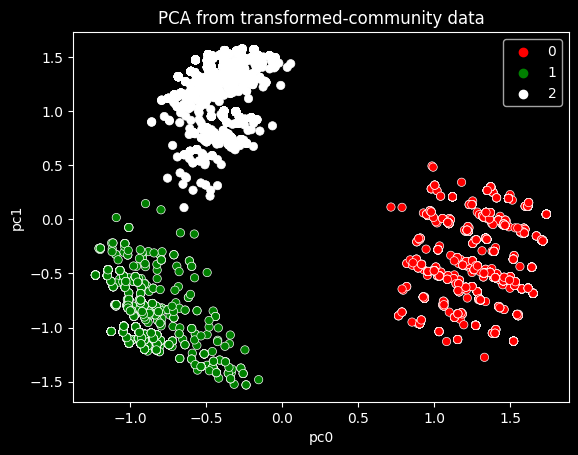

In [ ]:
# 20.1 PCA next:
pca = PCA(n_components= 2, whiten= True, random_state = None)
ss = StandardScaler()
commu_pca = pca.fit_transform(ss.fit_transform(fg_tr[0]))
commu_pca.shape

# 20.2 Assign column names and transform to DataFrame;

colnames = ["pc" + str(i) for i in range(trans_pca.shape[1])]
commu_pca = pd.DataFrame(commu_pca, columns = colnames)

# 20.3 PCA plot of transformed data:

plt.style.use("dark_background")
sns.scatterplot(data = trans_pca,
                x= 'pc0',
                y = 'pc1',
                hue = ytr.values,
                palette = ["red", "green", "white"]
                ).set(title='PCA from transformed-community data') ;

## Mutual information

In [ ]:
from sklearn.feature_selection import mutual_info_classif



In [ ]:
mi_scores = utils.calMIScores(train_trans[colList], ytr)
mi_scores[::3]  # show a few features with their MI scores

eig_area_mean_ck_concavity_worst_p_concavity_mean       0.411510
eig_area_mean_ck_area_mean_p_area_se                    0.398181
eig_area_mean_ck_area_mean_p_texture_mean               0.396951
eig_area_mean_ck_area_se_p_concavity_worst              0.388818
eig_area_mean_ck_area_mean_p_concavity_worst            0.386731
                                                          ...   
deg_texture_mean_ck_concavity_worst_p_concavity_mean    0.048080
eig_area_se_ck_concavity_worst                          0.043185
deg_texture_mean_ck_area_mean_p_concavity_worst         0.032534
bet_texture_mean_ck_area_se                             0.011870
pr_texture_mean_ck_area_se                              0.000000
Name: MI Scores, Length: 90, dtype: float64

In [ ]:
fe.cumsum()
len(fe)